In [1]:
from sklearn.datasets import make_circles
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC

In [2]:
# to construct 2D grids for plotting purposes
def giveme_grid(xc, nn=20):
    xmin = np.min(xc[:, 0])
    xmin -= .05*np.absolute(xmin)
    xmax = np.max(xc[:, 0])
    xmax += .05*np.absolute(xmax)
    ymin = np.min(xc[:, 1])
    ymin -= .05*np.absolute(ymin)
    ymax = np.max(xc[:, 1])
    ymax += .05*np.absolute(ymax)
    Xg = np.linspace(xmin,
                   xmax ,
                   nn) # or whatever values for x
    Yg = np.linspace(ymin,
                   ymax ,
                   nn)   # or whatever values for y
    X, Y = np.meshgrid(Xg, Yg)
    Xshape = X.shape
    x_grid = np.hstack((X.reshape(-1,1), Y.reshape(-1,1)))
    return x_grid, Xshape, Xg, Yg

# Create dataset non-linearly separable

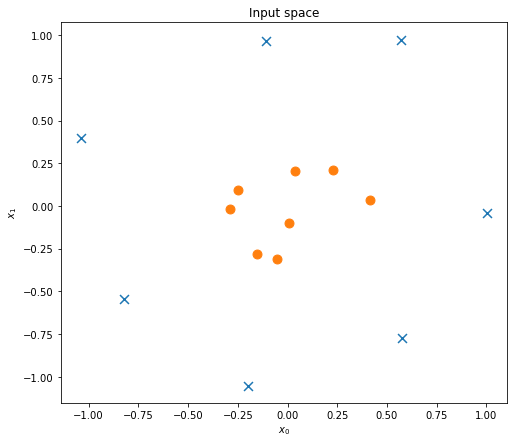

In [3]:

nc = 15
xc, yc = make_circles(nc, factor=0.3, noise=.1, random_state=42)
yc[yc==0]=-1

x_grid, Xshape, Xg, Yg = giveme_grid(xc)


ff,ax = plt.subplots(1,1, figsize=(8,7))
aa=ax
aa.scatter(xc[yc==-1,0], xc[yc==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xc[yc==1,0], xc[yc==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')
_=aa.set_title('Input space')

# First map onto proper Feature Space and the Linear SVM

In [17]:
# Map into a Feature space given by polar coordinates

r = np.sqrt(np.sum((xc**2),1))
angle = np.arctan(xc[:,1]/xc[:,0])


## Data in Feature Space (polar coordinates)

Text(0, 0.5, 'angle')

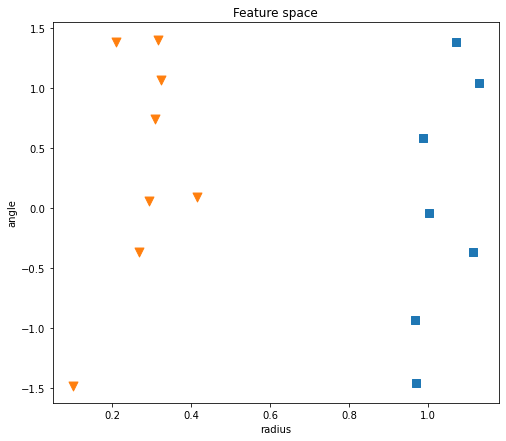

In [18]:



hc = np.vstack((r.T,angle.T)).T
ff,ax = plt.subplots(1,1, figsize=(8,7))
aa=ax
aa.scatter(hc[yc==-1,0], hc[yc==-1,1], marker='s', s=80, label='train - class' )
aa.scatter(hc[yc==1,0], hc[yc==1,1], marker='v', s=80, label='train + class' )
aa.set_title('Feature space')
aa.set_xlabel('radius')
aa.set_ylabel('angle')


## Apply linear SVM in feature space

In [5]:
# Linear SVM in Feature Space

svc = SVC(kernel='linear',
         C=1e8).fit(hc, yc*1.)

In [6]:
# for plotting purposes, classify points in the grid
h_grid, Hshape, Hg, HYg, = giveme_grid(hc)

Yp = svc.decision_function(h_grid).reshape(Hshape)

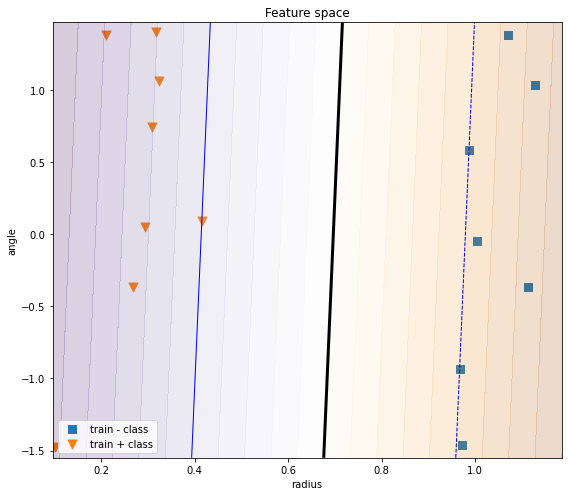

In [7]:

ff,ax = plt.subplots(1,1, figsize=(8,7))
aa=ax
aa.scatter(hc[yc==-1,0], hc[yc==-1,1], marker='s', s=80, label='train - class' )
aa.scatter(hc[yc==1,0], hc[yc==1,1], marker='v', s=80, label='train + class' )

aa.set_xlabel('radius')
aa.set_ylabel('angle')
cs=aa.contourf(Hg, HYg, Yp, 20, cmap='PuOr', alpha=0.2)
aa.contour(Hg, HYg, Yp, [0], colors='black',linewidths=3)
aa.contour(Hg, HYg, Yp, [-1,1], colors='blue', linewidths=1)

aa.set_title('Feature space')
aa.legend()
ff.tight_layout()

## Map classification boundary back into input space

In [8]:
# Compute boundary in Input Space
rg = np.sqrt(np.sum((x_grid**2),1))
phig = np.arctan(x_grid[:,1]/x_grid[:,0])
hcg = np.vstack((rg.T,phig.T)).T
Ypg = svc.decision_function(hcg).reshape(Xshape)

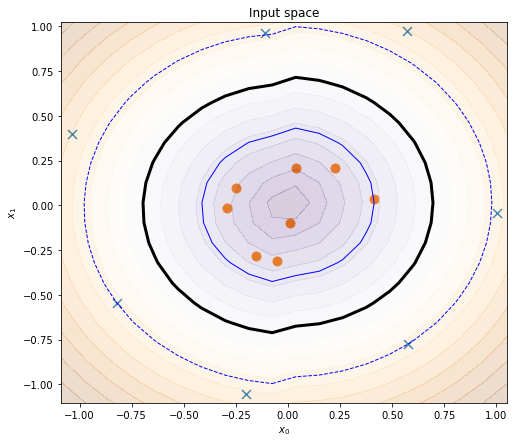

In [9]:
ff,ax = plt.subplots(1,1, figsize=(8,7))
aa=ax
aa.scatter(xc[yc==-1,0], xc[yc==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xc[yc==1,0], xc[yc==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')


cs=aa.contourf(Xg, Yg, Ypg, 20, cmap='PuOr', alpha=0.2)
aa.contour(Xg, Yg, Ypg, [0], colors='black',linewidths=3)
aa.contour(Xg, Yg, Ypg, [-1,1], colors='blue', linewidths=1)

_=aa.set_title('Input space')


## Alternative: use the kernel trick

In [19]:
# USE KERNEL TRICK
ksvc = SVC(C=1e20,
         kernel='rbf', # RBF kernel with parameter gamma
         gamma=.1).fit(xc, yc*1.)
Ypk = ksvc.decision_function(x_grid).reshape(Xshape)

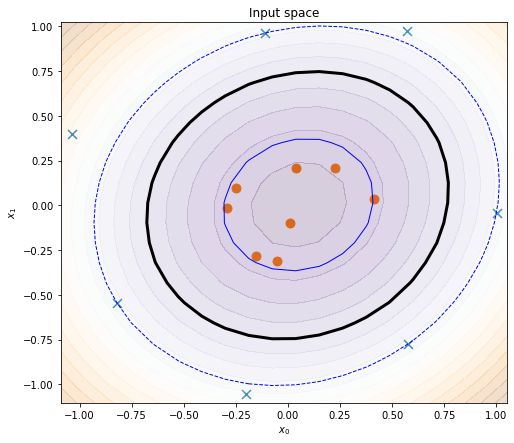

In [20]:


ff,aa = plt.subplots(1,1,figsize=(8,7))

aa.scatter(xc[yc==-1,0], xc[yc==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xc[yc==1,0], xc[yc==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')



cs=aa.contourf(Xg, Yg, Ypk, 20, cmap='PuOr', alpha=0.2)
aa.contour(Xg, Yg, Ypk, [0], colors='black',linewidths=3)
aa.contour(Xg, Yg, Ypk, [-1,1], colors='blue', linewidths=1)

_=aa.set_title('Input space')

# Soft Margin SVM

## add outliers to data

Text(0, 0.5, '$x_1$')

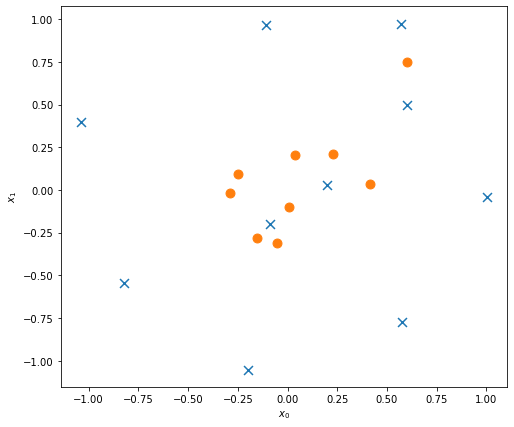

In [12]:
# soft margin

xk = np.vstack((xc, np.array([[0.2,0.03],[-0.09,-0.2],[.6, 0.75],[0.6, 0.5]])))
yk = np.hstack((yc,np.array([-1., -1., 1. , -1.])))


ff2,aa2 = plt.subplots(1,1, figsize=(8,7))
aa = aa2
aa.scatter(xk[yk==-1,0], xk[yk==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xk[yk==1,0], xk[yk==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')



## Use a kernel SVM in a separable framework

In [13]:
# Separable case
# notice C=100000000 means C-> infinity
model = SVC(C=1e18,kernel='rbf', gamma=1).fit(xk,yk) 
Ypg = model.decision_function(x_grid).reshape(Xshape)

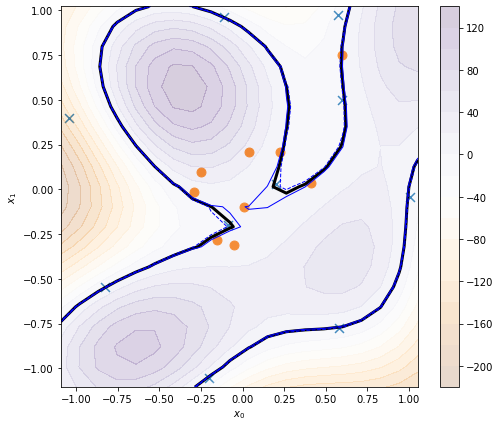

In [14]:
ff2,aa2 = plt.subplots(1,1, figsize=(8,7))
aa = aa2
aa.scatter(xk[yk==-1,0], xk[yk==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xk[yk==1,0], xk[yk==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')
cs=aa.contourf(Xg, Yg, Ypg, 20, cmap='PuOr', alpha=0.2)
aa.contour(Xg, Yg, Ypg, [0], colors='black',linewidths=3)
aa.contour(Xg, Yg, Ypg, 
           [-1,1], colors='blue', linewidths=1)
_=ff.colorbar(cs, ax=aa)

## Alternative: soft margin kernel SVM

In [15]:
#soft margin RBF case
model = SVC(C=10,kernel='rbf', gamma=1).fit(xk,yk)
Ypg = model.decision_function(x_grid).reshape(Xshape)

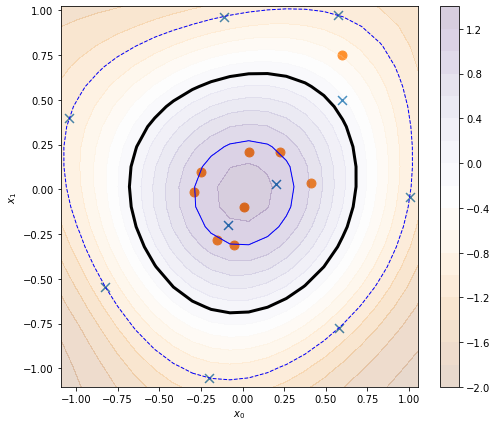

In [16]:
ff2,aa2 = plt.subplots(1,1, figsize=(8,7))
aa = aa2
aa.scatter(xk[yk==-1,0], xk[yk==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xk[yk==1,0], xk[yk==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')
cs=aa.contourf(Xg, Yg, Ypg, 20, cmap='PuOr', alpha=0.2)
aa.contour(Xg, Yg, Ypg, [0], colors='black',linewidths=3)
aa.contour(Xg, Yg, Ypg, 
           [-1,1], colors='blue', linewidths=1)
_=ff.colorbar(cs, ax=aa)

## Another alternative, soft margin linear SVM

In [30]:
#soft margin linear case
model = SVC(C=1000,kernel='linear').fit(xk,yk)
Ypg = model.decision_function(x_grid).reshape(Xshape)

/var/folders/9s/m4_j5q_55y39sz_qwbgjxqzc0000zm/T/ipykernel_1994/750782622.py:8: UserWarning: No contour levels were found within the data range.
  aa.contour(Xg, Yg, Ypg, [0], colors='black',linewidths=3)


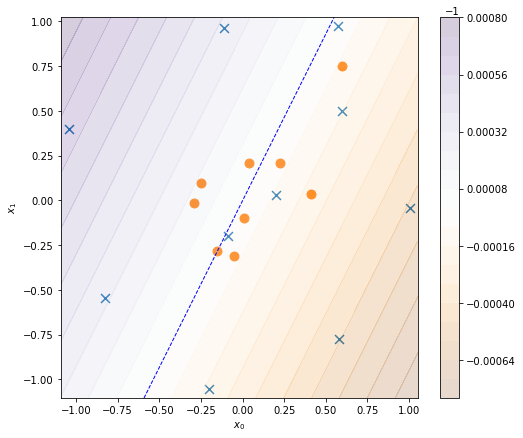

In [31]:
ff2,aa2 = plt.subplots(1,1, figsize=(8,7))
aa = aa2
aa.scatter(xk[yk==-1,0], xk[yk==-1,1], marker='x', s=80, label='train - class' )
aa.scatter(xk[yk==1,0], xk[yk==1,1], marker='o', s=80, label='train + class' )
aa.set_xlabel('$x_0$')
aa.set_ylabel('$x_1$')
cs=aa.contourf(Xg, Yg, Ypg, 20, cmap='PuOr', alpha=0.2)
aa.contour(Xg, Yg, Ypg, [0], colors='black',linewidths=3)
aa.contour(Xg, Yg, Ypg, 
           [-1,1], colors='blue', linewidths=1)
_=ff.colorbar(cs, ax=aa)